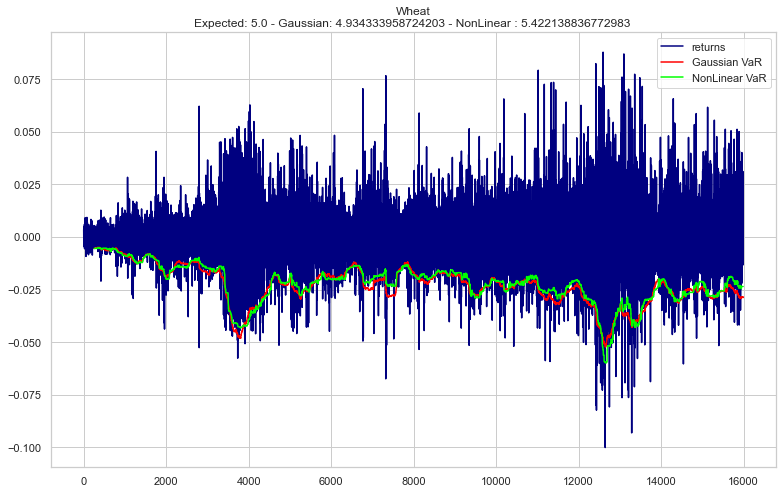

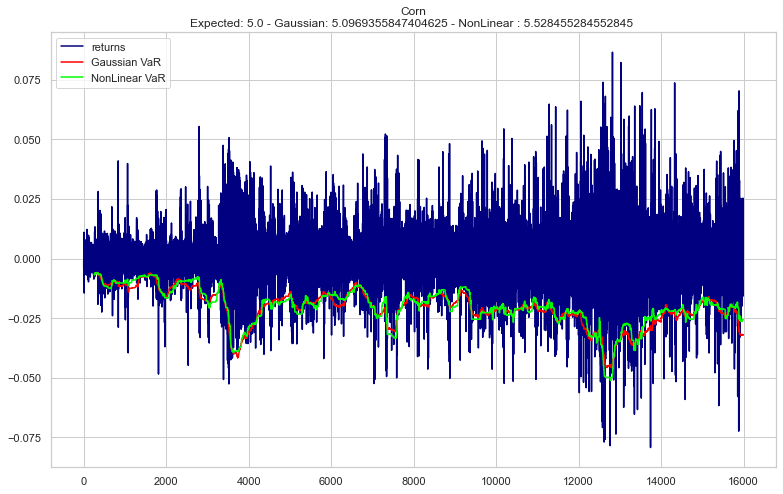

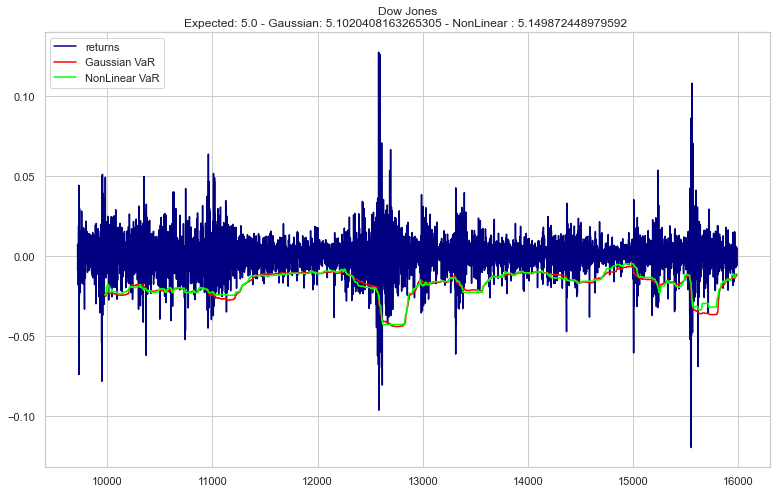

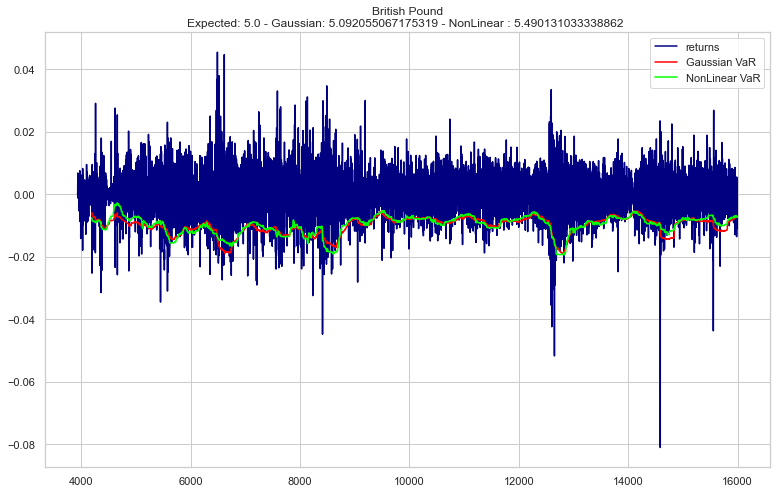

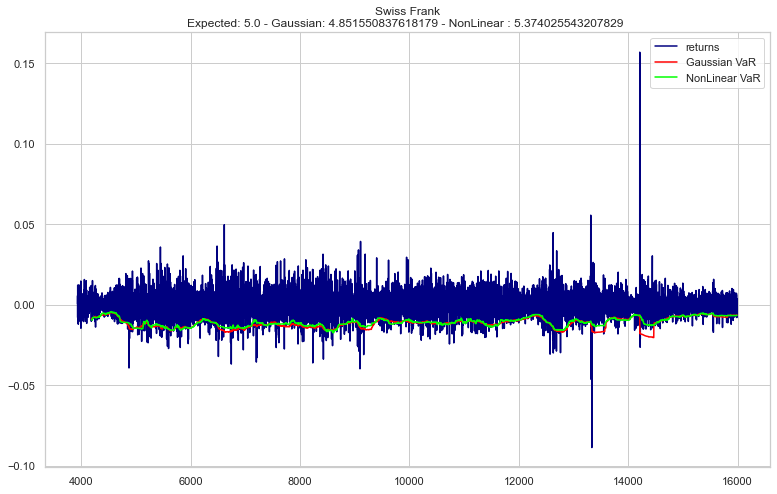

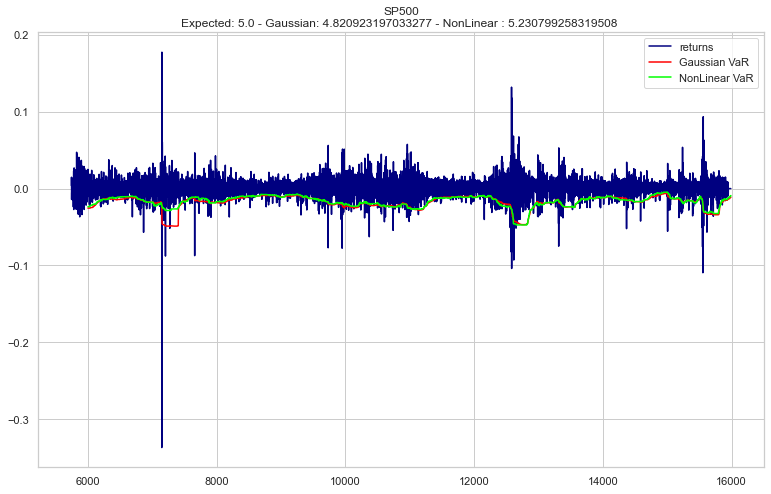

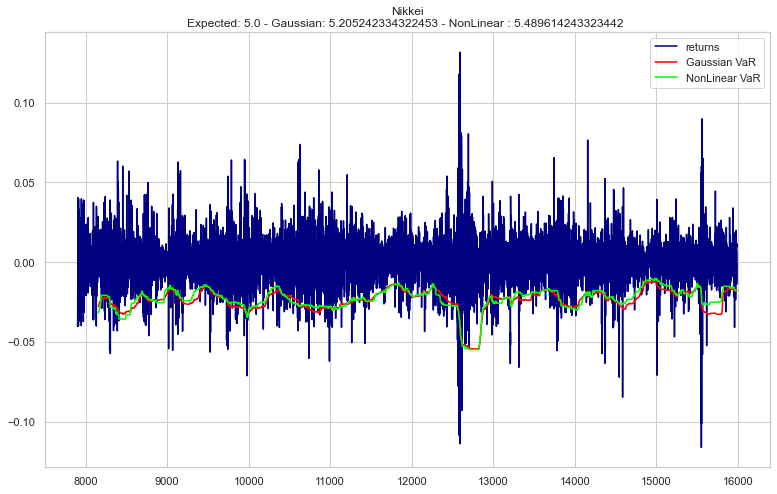

In [2]:
import numpy as np 
import math 
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="whitegrid")
from scipy import stats
import scipy 
plt.rcParams["figure.figsize"] = (13,8)

def nonlin_VaR(x, lev):
    return x.quantile(lev)

futures = pd.read_csv("futures.csv")
rw = 256
levels = [0.05, 0.01]
quantile = scipy.stats.norm.ppf(levels)

def VaR(futures, level):
    quantile = scipy.stats.norm.ppf(level)
    
    for j in range(1,len(futures.columns)):
        df = futures.iloc[:, [0,j]].dropna()
        name = df.columns[1]
        df.loc[:,"returns"] = np.log(df.loc[:,name]/df.loc[:,name].shift(1))
        #do we need to add the mean ? 
        #for theory the mean of log returns is 0 
        
        df.loc[:,"Gaussian VaR"] = quantile * df.loc[:,"returns"].rolling(rw).std()# + df.loc[:,"returns"].rolling(rw).mean()
        df.loc[:,"NonLinear VaR"] = df.loc[:,"returns"].rolling(rw).apply(lambda x: nonlin_VaR(x, level))
        # here we shift in order to consider return of the next period (next day)
        df.loc[:,"returns"] = df.loc[:,"returns"].shift(-1)
        df.loc[:, "Error_Gaussian"] = 1*(df.loc[:, "returns"] < df.loc[:, "Gaussian VaR"])
        df.loc[:, "Error_NonLin"] = 1*(df.loc[:, "returns"] < df.loc[:, "NonLinear VaR"])
        #count the exception and we are also going to normalize it 
        sum_gaus = df.loc[:, "Error_Gaussian"].sum()/len(df) * 100
        sum_nonline = df.loc[:, "Error_NonLin"].sum()/len(df) * 100 
        #TODO set date as index and then plot
        col = {"returns" : "navy", 
               "Gaussian VaR": "red",
               "NonLinear VaR": "lime"}
        
        df.iloc[:,[2,3,4]].plot(color = col)
        plt.title(f"{name}\nExpected: {level*100} - Gaussian: {sum_gaus} - NonLinear : {sum_nonline} ")
        plt.show()

VaR(futures, 0.05)